# Öğrenci Bilgileri
* **Adı:** ibrahim
* **Soyadı:** kahraman
* **Okul Numarası:** 2212729009
* **GitHub Repo Bağlantısı:** https://github.com/ibrahimkahramann/CNN-Image-Classification-Project

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os

PROJECT_PATH = "/content/drive/MyDrive/Colab Notebooks/CNN-Image-Classification-Project"

DATASET_PATH = os.path.join(PROJECT_PATH, "dataset")

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_SIZE = (IMG_HEIGHT, IMG_WIDTH)

BATCH_SIZE = 16

print("Veri seti klasörünün içeriği:")
!ls -l "$DATASET_PATH"

Veri seti klasörünün içeriği:
total 8
drwx------ 2 root root 4096 Nov 12 17:12 fork
drwx------ 2 root root 4096 Nov 12 17:12 spoon


In [3]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='binary'
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='binary'
)

class_names = train_dataset.class_names
print("\nBulunan sınıflar:", class_names)

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

print("Eğitim ve Doğrulama setleri başarıyla oluşturuldu ve optimize edildi.")

Found 128 files belonging to 2 classes.
Using 103 files for training.
Found 128 files belonging to 2 classes.
Using 25 files for validation.

Bulunan sınıflar: ['fork', 'spoon']
Eğitim ve Doğrulama setleri başarıyla oluşturuldu ve optimize edildi.


In [4]:
base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)
)

base_model.trainable = False

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

    base_model,

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,763,521 (60.13 MB)

 Trainable params: 1,048,833 (4.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.6641 - loss: 0.6469 - val_accuracy: 0.9200 - val_loss: 0.3501
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.9258 - loss: 0.1666 - val_accuracy: 0.9200 - val_loss: 0.2978
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9751 - loss: 0.0966 - val_accuracy: 0.8800 - val_loss: 0.4187
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9574 - loss: 0.0731 - val_accuracy: 0.9200 - val_loss: 0.3058
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9777 - loss: 0.0758 - val_accuracy: 0.8800 - val_loss: 0.3842
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9613 - loss: 0.1098 - val_accuracy: 0.9200 - val_loss: 0.2751
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9820 - loss: 0.0664 - val_accuracy: 0.9200 - val_loss: 0.2266
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9910 - loss: 0.0361 - val_accuracy: 0.8000 - val_loss: 0.3658


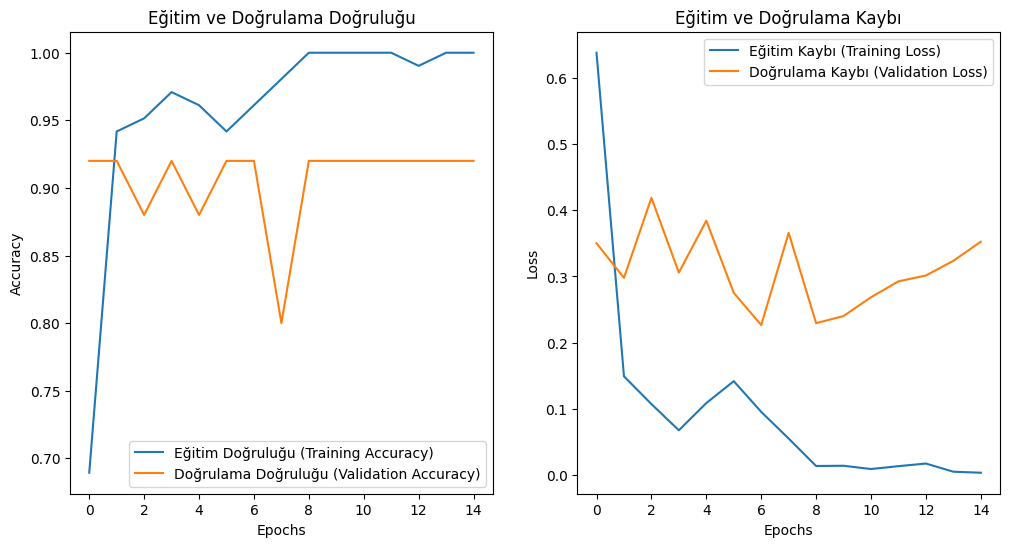


--- Test Seti Değerlendirmesi ---
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9050 - loss: 0.4165
Modelin Test Doğruluğu (Validation Accuracy): 92.00%


In [5]:
EPOCHS = 15

history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=validation_dataset
)

print("\n--- Eğitim Sonuç Grafikleri ---")

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Eğitim Doğruluğu (Training Accuracy)')
plt.plot(epochs_range, val_acc, label='Doğrulama Doğruluğu (Validation Accuracy)')
plt.legend(loc='lower right')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Eğitim Kaybı (Training Loss)')
plt.plot(epochs_range, val_loss, label='Doğrulama Kaybı (Validation Loss)')
plt.legend(loc='upper right')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

print("\n--- Test Seti Değerlendirmesi ---")
test_loss, test_accuracy = model.evaluate(validation_dataset)
print(f"Modelin Test Doğruluğu (Validation Accuracy): {test_accuracy * 100:.2f}%")


--- Hata Analizi: Model Nerede Yanıldı? ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Model toplam 25 fotoğraftan 2 adetinde hata yaptı.
Hatalı tahminler aşağıda gösteriliyor...


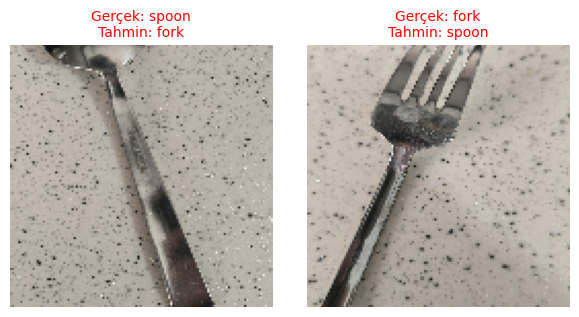

In [6]:
import numpy as np

print("\n--- Hata Analizi: Model Nerede Yanıldı? ---")

validation_images = []
validation_labels = []

for images, labels in validation_dataset:
    validation_images.append(images.numpy())
    validation_labels.append(labels.numpy())

validation_images = np.concatenate(validation_images, axis=0)
validation_labels = np.concatenate(validation_labels, axis=0).flatten()

predictions_raw = model.predict(validation_images)

predicted_classes = (predictions_raw > 0.5).astype(int).flatten()

true_classes = validation_labels.astype(int)

mismatched_indices = np.where(predicted_classes != true_classes)[0]

if len(mismatched_indices) == 0:
    print("🎉 Harika! Model, doğrulama setindeki hiçbir fotoğrafta hata yapmadı.")
else:
    print(f"Model toplam {len(true_classes)} fotoğraftan {len(mismatched_indices)} adetinde hata yaptı.")
    print("Hatalı tahminler aşağıda gösteriliyor...")

    plt.figure(figsize=(15, 6))
    plot_count = min(len(mismatched_indices), 10)

    for i in range(plot_count):
        plt.subplot(2, 5, i + 1)

        idx = mismatched_indices[i]

        plt.imshow(validation_images[idx].astype("uint8"))
        plt.axis('off')

        true_label = class_names[true_classes[idx]]
        pred_label = class_names[predicted_classes[idx]]

        plt.title(f"Gerçek: {true_label}\nTahmin: {pred_label}", color='red', fontsize=10)

    plt.tight_layout()
    plt.show()